<a href="https://colab.research.google.com/github/snootchi/Clustering-Association-Algorithms/blob/main/RFM_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What Is Recency, Frequency, Monetary Value (RFM)?
Recency, frequency, monetary value (RFM) is a model used in marketing analysis that segments a company’s consumer base by their purchasing patterns or habits. In particular, it evaluates customers’ recency (how long ago they made a purchase), frequency (how often they make purchases), and monetary value (how much money they spend).

RFM is then used to identify a company’s or an organization’s best customers by measuring and analyzing spending habits to improve low-scoring customers and maintain high-scoring ones.

Understanding Recency, Frequency, Monetary Value
The RFM model is based on three quantitative factors:

1-**Recency**: How recently a customer has made a purchase

2-**Frequency**: How often a customer makes a purchase

3-**Monetary value**: How much money a customer spends on purchases
RFM analysis numerically ranks a customer in each of these three categories, generally on a scale of 1 to 5 (the higher the number, the better the result). The “best” customer would receive a top score in every category.

These three RFM factors can be used to reasonably predict how likely (or unlikely) it is that a customer will do business again with a firm or, in the case of a charitable organization, make another donation.

# What's the purpose of RFM analysis?
RFM aims to help businesses identify their target audiences by telling them who the most valuable customers are to the company. With RFM analysis, you can determine what percentage of your customers support the business and leverage this information to develop more effective marketing campaigns while boosting brand loyalty and increasing conversions as customers move along the customer journey.

Predicting future customer behavior through RFM analysis can help businesses understand how likely customers will purchase another product or service and how much they will spend. But, of course, after further research, you may find that your company is supported by only a small percentage of its clients, and those are the individuals who should become your primary target audience.

For example, you can improve your email marketing success rates with RFM analysis by understanding your target audience. Then, you can effectively segment them to send personalized emails and offers that are most likely to convert, leading to increased retention rates, customer satisfaction, and sales.

# Data Understanding

In [1]:
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_white"

In [2]:
import pandas as pd
import numpy as np
data = pd.read_csv('/content/rfm_data.csv')
data.head() , data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          1000 non-null   int64  
 1   PurchaseDate        1000 non-null   object 
 2   TransactionAmount   1000 non-null   float64
 3   ProductInformation  1000 non-null   object 
 4   OrderID             1000 non-null   int64  
 5   Location            1000 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 47.0+ KB


(   CustomerID PurchaseDate  TransactionAmount ProductInformation  OrderID  \
 0        8814   2023-04-11             943.31          Product C   890075   
 1        2188   2023-04-11             463.70          Product A   176819   
 2        4608   2023-04-11              80.28          Product A   340062   
 3        2559   2023-04-11             221.29          Product A   239145   
 4        9482   2023-04-11             739.56          Product A   194545   
 
    Location  
 0     Tokyo  
 1    London  
 2  New York  
 3    London  
 4     Paris  ,
 None)

In [3]:
len(data[data['CustomerID'].duplicated(keep='last')]  ) , data['CustomerID'].nunique()

(54, 946)

In [4]:
#convert PurchaseDate to Datetime
data['PurchaseDate'] = pd.to_datetime(data['PurchaseDate'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   CustomerID          1000 non-null   int64         
 1   PurchaseDate        1000 non-null   datetime64[ns]
 2   TransactionAmount   1000 non-null   float64       
 3   ProductInformation  1000 non-null   object        
 4   OrderID             1000 non-null   int64         
 5   Location            1000 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 47.0+ KB


In [5]:
data.groupby("CustomerID", group_keys=True).apply(lambda x: x)


CustomerID PurchaseDate  TransactionAmount ProductInformation  \
CustomerID                                                                      
1011       371        1011   2023-05-02             918.72          Product B   
           482        1011   2023-05-08             210.30          Product B   
1025       659        1025   2023-05-20             359.29          Product D   
1029       991        1029   2023-06-10             704.99          Product D   
1046       298        1046   2023-04-28             859.82          Product B   
...                    ...          ...                ...                ...   
9941       306        9941   2023-04-29             960.53          Product B   
9950       395        9950   2023-05-03             679.11          Product C   
9954       803        9954   2023-05-29             798.01          Product B   
9985       57         9985   2023-04-14              36.10          Product D   
9991       542        9991   2023-05-11             626.81          Product B   

                OrderID  Location  
CustomerID                         
1011       371   945619    London  
           482   781571     Paris  
1025       659   296412  New York  
1029       991   992083  New York  
1046       298   236306     Paris  
...                 ...       ...  
9941       306   412534     Paris  
9950       395   739711     Tokyo  
9954       803   106687     Tokyo  
9985       57    649435  New York  
9991       542   828834  New York  

[1000 rows x 6 columns]

In [6]:
max(data['PurchaseDate'])

Timestamp('2023-06-10 00:00:00')

# Calculating RFM Values

In [7]:
from datetime import datetime

# Calculate Recency
data['Recency'] = (datetime.now().date() - data['PurchaseDate'].dt.date).dt.days

# Calculate Frequency
frequency_data = data.groupby('CustomerID')['OrderID'].count().reset_index()
frequency_data.rename(columns={'OrderID': 'Frequency'}, inplace=True)
data = data.merge(frequency_data, on='CustomerID', how='left')

# Calculate Monetary Value
monetary_data = data.groupby('CustomerID')['TransactionAmount'].sum().reset_index()
monetary_data.rename(columns={'TransactionAmount': 'MonetaryValue'}, inplace=True)
data = data.merge(monetary_data, on='CustomerID', how='left')

In [8]:
data

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,MonetaryValue
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,88,1,943.31
1,2188,2023-04-11,463.70,Product A,176819,London,88,1,463.70
2,4608,2023-04-11,80.28,Product A,340062,New York,88,1,80.28
3,2559,2023-04-11,221.29,Product A,239145,London,88,1,221.29
4,9482,2023-04-11,739.56,Product A,194545,Paris,88,1,739.56
...,...,...,...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,275284,London,28,1,759.62
996,6669,2023-06-10,941.50,Product C,987025,New York,28,1,941.50
997,8836,2023-06-10,545.36,Product C,512842,London,28,1,545.36
998,1440,2023-06-10,729.94,Product B,559753,Paris,28,1,729.94


# Calculatng RFM Scores

In [9]:
# Define scoring criteria for each RFM value
recency_scores = [5, 4, 3, 2, 1]  # Higher score for lower recency (more recent)
frequency_scores = [1, 2, 3, 4, 5]  # Higher score for higher frequency
monetary_scores = [1, 2, 3, 4, 5]  # Higher score for higher monetary value

# Calculate RFM scores
data['RecencyScore'] = pd.cut(data['Recency'], bins=5, labels=recency_scores)
data['FrequencyScore'] = pd.cut(data['Frequency'], bins=5, labels=frequency_scores)
data['MonetaryScore'] = pd.cut(data['MonetaryValue'], bins=5, labels=monetary_scores)

We assigned scores from 5 to 1 to calculate the recency score, where a higher score indicates a more recent purchase. It means that customers who have purchased more recently will receive higher recency scores.

We assigned scores from 1 to 5 to calculate the frequency score, where a higher score indicates a higher purchase frequency. Customers who made more frequent purchases will receive higher frequency scores.

To calculate the monetary score, we assigned scores from 1 to 5, where a higher score indicates a higher amount spent by the customer.

To calculate RFM scores, we used the **pd.cut()** function to divide recency, frequency, and monetary values into bins. We define 5 bins for each value and assign the corresponding scores to each bin.

Once the scores are added to the data, you will notice that they are categorical variables. You can use the data.info() method to confirm this. So we need to convert their datatype into integers to use these scores further:

In [10]:
# Convert RFM scores to numeric type
data['RecencyScore'] = data['RecencyScore'].astype(int)
data['FrequencyScore'] = data['FrequencyScore'].astype(int)
data['MonetaryScore'] = data['MonetaryScore'].astype(int)

# RFM Value Segmentation

In [11]:
# Calculate RFM score by combining the individual scores
data['RFM_Score'] = data['RecencyScore'] + data['FrequencyScore'] + data['MonetaryScore']

# Create RFM segments based on the RFM score
segment_labels = ['Low-Value', 'Mid-Value', 'High-Value']
data['Value Segment'] = pd.qcut(data['RFM_Score'], q=3, labels=segment_labels)

After calculating the RFM scores, we created RFM segments based on the scores. We divided RFM scores into three segments, namely “Low-Value”, “Mid-Value”, and “High-Value”. Segmentation is done using the **pd.qcut()** function, which evenly distributes scores between segments.



In [12]:
data.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,Value Segment
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,88,1,943.31,1,1,2,4,Low-Value
1,2188,2023-04-11,463.70,Product A,176819,London,88,1,463.70,1,1,1,3,Low-Value
2,4608,2023-04-11,80.28,Product A,340062,New York,88,1,80.28,1,1,1,3,Low-Value
3,2559,2023-04-11,221.29,Product A,239145,London,88,1,221.29,1,1,1,3,Low-Value
4,9482,2023-04-11,739.56,Product A,194545,Paris,88,1,739.56,1,1,2,4,Low-Value


In [13]:
# RFM Segment Distribution
segment_counts = data['Value Segment'].value_counts().reset_index()
segment_counts.columns = ['Value Segment', 'Count']

pastel_colors = px.colors.qualitative.Pastel

# Create the bar chart
fig_segment_dist = px.bar(segment_counts, x='Value Segment', y='Count',
                          color='Value Segment', color_discrete_sequence=pastel_colors,
                          title='RFM Value Segment Distribution')

# Update the layout
fig_segment_dist.update_layout(xaxis_title='RFM Value Segment',
                              yaxis_title='Count',
                              showlegend=False)

# Show the figure
fig_segment_dist.show()

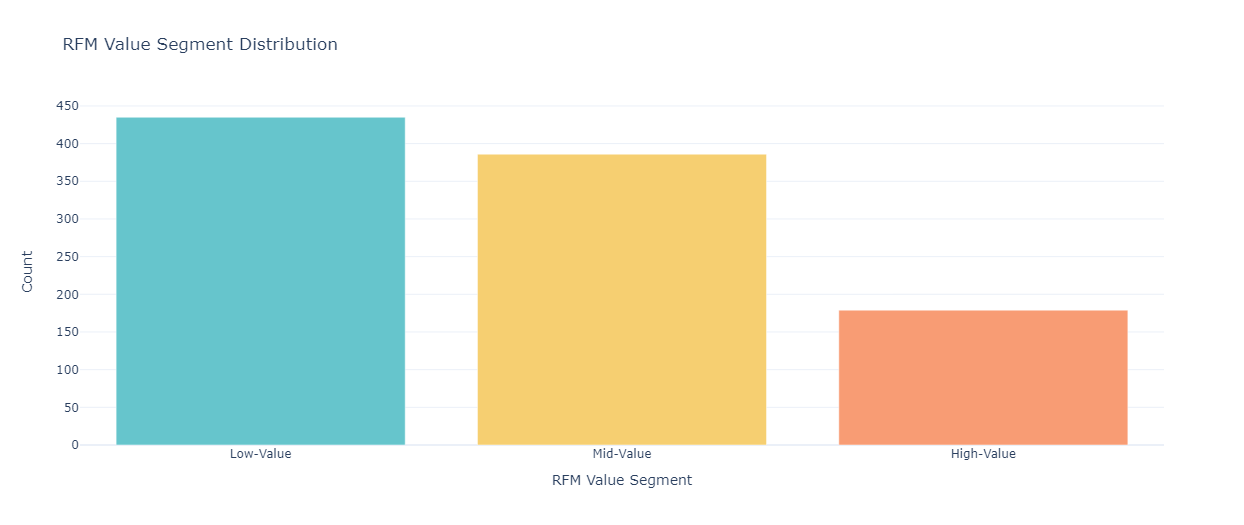

In [14]:
fig = go.Figure()
l_v = data[data['Value Segment']=='Low-Value']
m_l = data[data['Value Segment']=='Mid-Value']
h_v = data[data['Value Segment']=='High-Value']


fig.add_trace(go.Scatter(
    x=l_v['Recency'],
    y=l_v['MonetaryValue'],
    mode='markers',
    name='Low Value Client',
    marker=dict(
        color='red',
        size=8,
        line=dict(width=1, color='black')
    )
))

fig.add_trace(go.Scatter(
    x=m_l['Recency'],
    y=m_l['MonetaryValue'],
    mode='markers',
    name='Mid Value Client',
    marker=dict(
        color='yellow',
        size=8,
        line=dict(width=1, color='black')
    )
))

fig.add_trace(go.Scatter(
    x=h_v['Recency'],
    y=h_v['MonetaryValue'],
    mode='markers',
    name='High Value Client',
    marker=dict(
        color='green',
        size=8,
        line=dict(width=1, color='black')
    )
))
fig.update_layout(
    xaxis=dict(title='Recency'),
    yaxis=dict(title='MonetaryValue'),
    title='Segmentation of Clients based on Recency and Monetary Value')

fig.show()

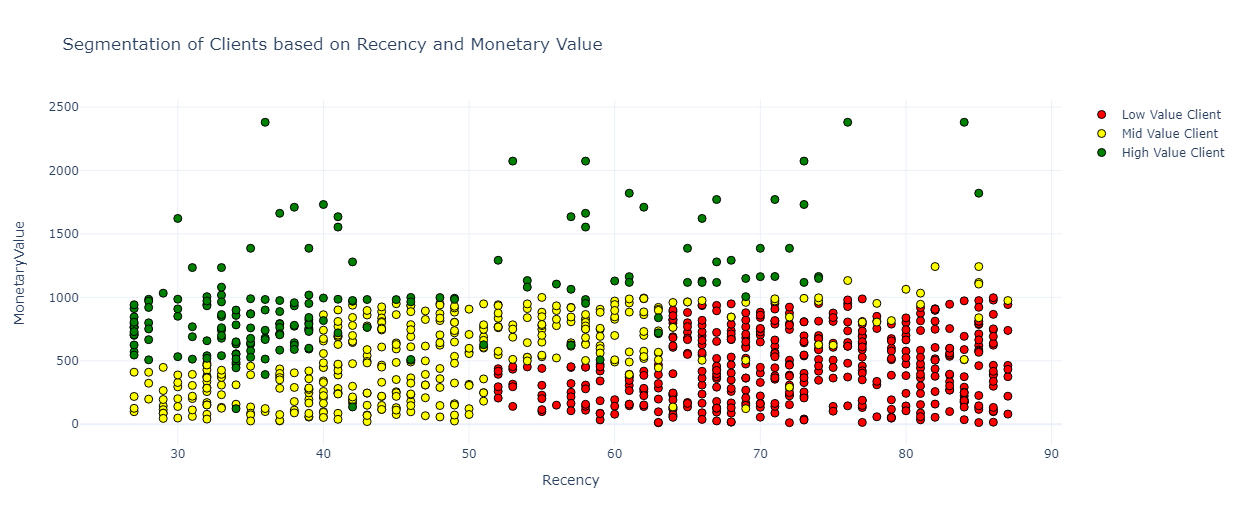

Now let’s create and analyze RFM Customer Segments that are broader classifications based on the RFM scores. These segments, such as **“Champions”**, **“Potential Loyalists”**, and **“Can’t Lose”** provide a more **strategic **perspective on customer behaviour and characteristics in terms of recency, frequency, and monetary aspects. Here’s how to create the RFM customer segments:



In [15]:
# Create a new column for RFM Customer Segments
data['RFM Customer Segments'] = ''

# Assign RFM segments based on the RFM score
data.loc[data['RFM_Score'] >= 9, 'RFM Customer Segments'] = 'Champions'
data.loc[(data['RFM_Score'] >= 6) & (data['RFM_Score'] < 9), 'RFM Customer Segments'] = 'Potential Loyalists'
data.loc[(data['RFM_Score'] >= 5) & (data['RFM_Score'] < 6), 'RFM Customer Segments'] = 'At Risk Customers'
data.loc[(data['RFM_Score'] >= 4) & (data['RFM_Score'] < 5), 'RFM Customer Segments'] = "Can't Lose"
data.loc[(data['RFM_Score'] >= 3) & (data['RFM_Score'] < 4), 'RFM Customer Segments'] = "Lost"

# Print the updated data with RFM segments
print(data[['CustomerID', 'RFM Customer Segments']])

     CustomerID RFM Customer Segments
0          8814            Can't Lose
1          2188                  Lost
2          4608                  Lost
3          2559                  Lost
4          9482            Can't Lose
..          ...                   ...
995        2970   Potential Loyalists
996        6669   Potential Loyalists
997        8836   Potential Loyalists
998        1440   Potential Loyalists
999        4759   Potential Loyalists

[1000 rows x 2 columns]


# RFM Analysis

Now let’s analyze the distribution of customers across different RFM customer segments within each value segment:



In [16]:
data.groupby(['Value Segment', 'RFM Customer Segments']).size().reset_index(name='Count').sort_values('Count', ascending=False)

,Value Segment,RFM Customer Segments,Count
9,Mid-Value,Potential Loyalists,386
0,Low-Value,At Risk Customers,180
1,Low-Value,Can't Lose,173
14,High-Value,Potential Loyalists,117
3,Low-Value,Lost,82
12,High-Value,Champions,62
2,Low-Value,Champions,0
4,Low-Value,Potential Loyalists,0
5,Mid-Value,At Risk Customers,0
6,Mid-Value,Can't Lose,0


In [17]:
segment_product_counts = data.groupby(['Value Segment', 'RFM Customer Segments']).size().reset_index(name='Count')

segment_product_counts = segment_product_counts.sort_values('Count', ascending=False)

fig_treemap_segment_product = px.treemap(segment_product_counts,
                                         path=['Value Segment', 'RFM Customer Segments'],
                                         values='Count',
                                         color='Value Segment', color_discrete_sequence=px.colors.qualitative.Pastel,
                                         title='RFM Customer Segments by Value')
fig_treemap_segment_product.show()

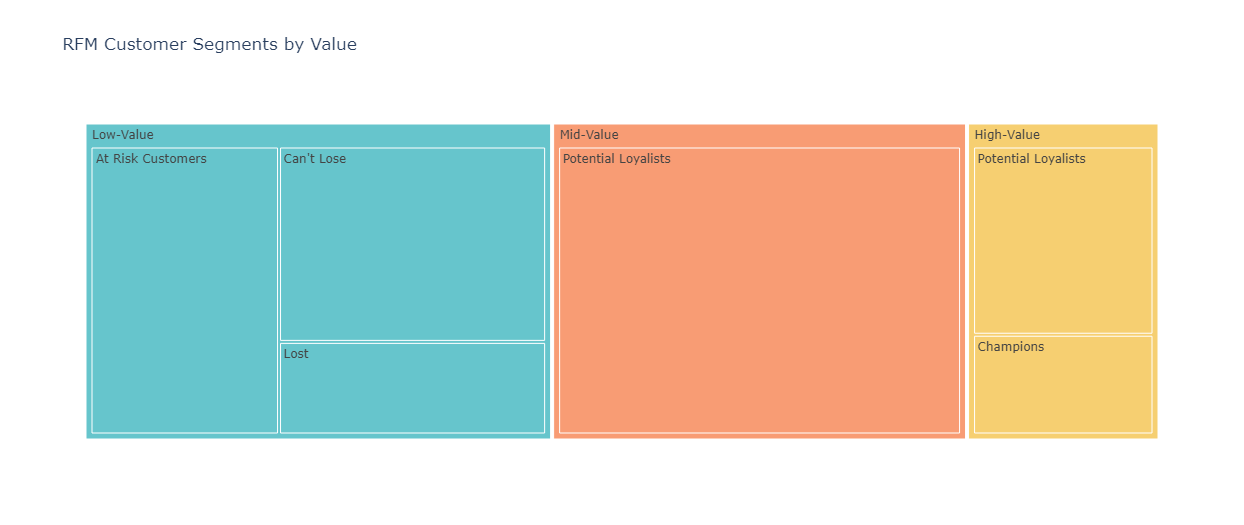

>>> This is an interactive visualization, so you will get more insights about each segment after clicking on the segment.





Now let’s analyze the distribution of RFM values within the Champions segment:



In [18]:
# Filter the data to include only the customers in the Champions segment
champions_segment = data[data['RFM Customer Segments'] == 'Champions']

fig = go.Figure()
fig.add_trace(go.Box(y=champions_segment['RecencyScore'], name='Recency'))
fig.add_trace(go.Box(y=champions_segment['FrequencyScore'], name='Frequency'))
fig.add_trace(go.Box(y=champions_segment['MonetaryScore'], name='Monetary'))

fig.update_layout(title='Distribution of RFM Values within Champions Segment',
                  yaxis_title='RFM Value',
                  showlegend=True)

fig.show()

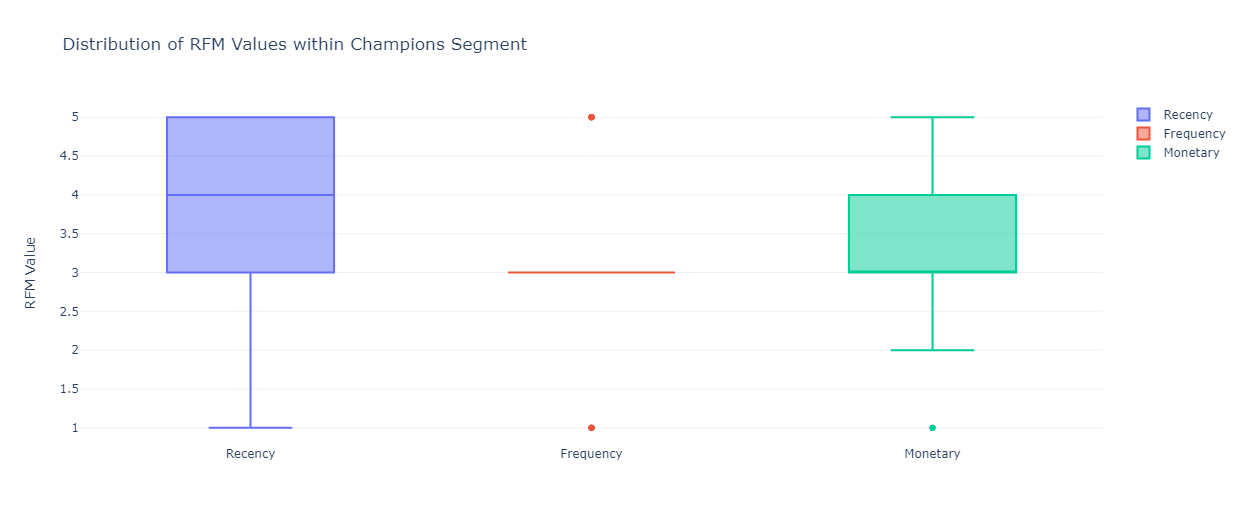

In [19]:
correlation_matrix = champions_segment[['RecencyScore', 'FrequencyScore', 'MonetaryScore']].corr()

# Visualize the correlation matrix using a heatmap
fig_heatmap = go.Figure(data=go.Heatmap(
                   z=correlation_matrix.values,
                   x=correlation_matrix.columns,
                   y=correlation_matrix.columns,
                   colorscale='RdBu',
                   colorbar=dict(title='Correlation')))

fig_heatmap.update_layout(title='Correlation Matrix of RFM Values within Champions Segment')

fig_heatmap.show()

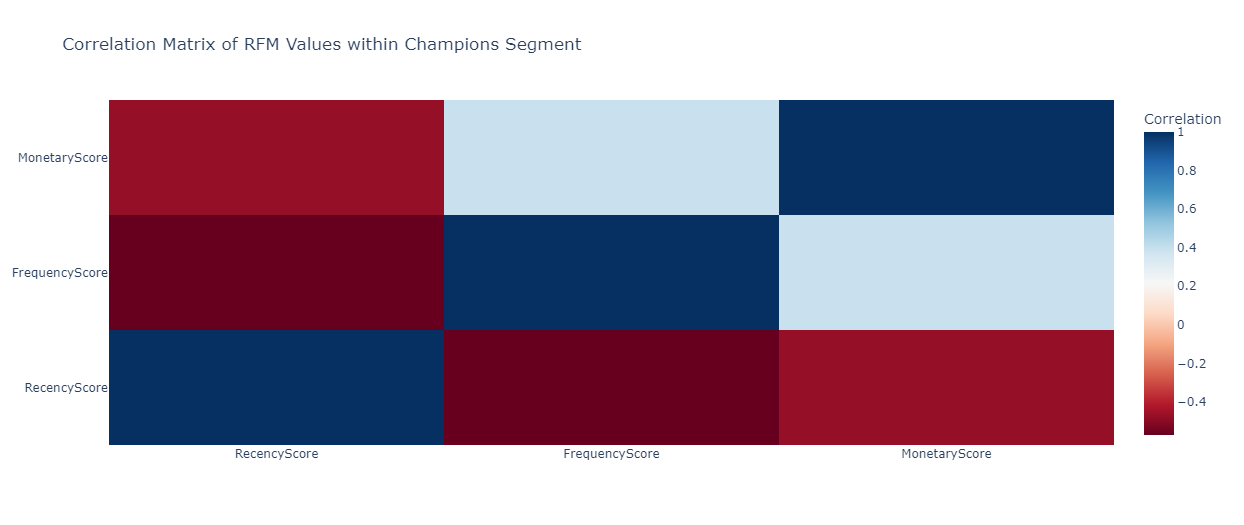

In [20]:
import plotly.colors

pastel_colors = plotly.colors.qualitative.Pastel

segment_counts = data['RFM Customer Segments'].value_counts()
fig = go.Figure(data=go.Bar(x = segment_counts.index , y=segment_counts.values,marker=dict(color=pastel_colors)))
# Update the layout
fig.update_layout(title='Comparison of RFM Segments',
                  xaxis_title='RFM Segments',
                  yaxis_title='Number of Customers',
                  showlegend=False)

fig.show()

Now let’s have a look at the recency, frequency, and monetary scores of all the segments:



In [21]:
# Calculate the average Recency, Frequency, and Monetary scores for each segment
segment_scores = data.groupby('RFM Customer Segments')['RecencyScore', 'FrequencyScore', 'MonetaryScore'].mean().reset_index()

# Create a grouped bar chart to compare segment scores
fig = go.Figure()

# Add bars for Recency score
fig.add_trace(go.Bar(
    x=segment_scores['RFM Customer Segments'],
    y=segment_scores['RecencyScore'],
    name='Recency Score',
    marker_color='rgb(158,202,225)'
))

# Add bars for Frequency score
fig.add_trace(go.Bar(
    x=segment_scores['RFM Customer Segments'],
    y=segment_scores['FrequencyScore'],
    name='Frequency Score',
    marker_color='rgb(94,158,217)'
))

# Add bars for Monetary score
fig.add_trace(go.Bar(
    x=segment_scores['RFM Customer Segments'],
    y=segment_scores['MonetaryScore'],
    name='Monetary Score',
    marker_color='rgb(32,102,148)'
))

# Update the layout
fig.update_layout(
    title='Comparison of RFM Segments based on Recency, Frequency, and Monetary Scores',
    xaxis_title='RFM Segments',
    yaxis_title='Score',
    barmode='group',
    showlegend=True
)

fig.show()

<ipython-input-21-cb2923398eb1>:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



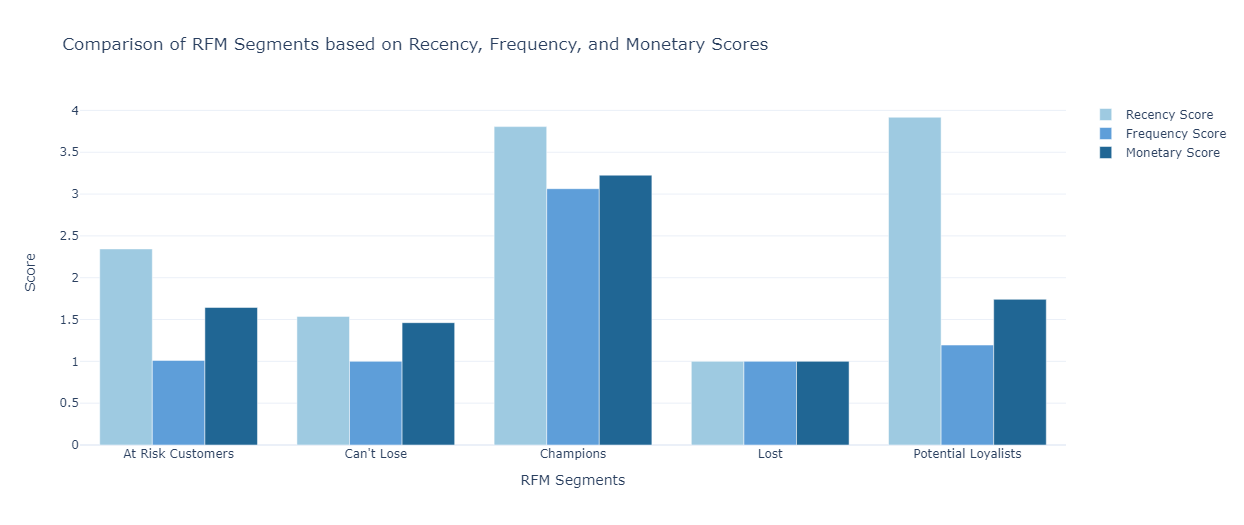